In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



n=750

X = np.linspace(-5,5, n)


y_flat = 4*X-3

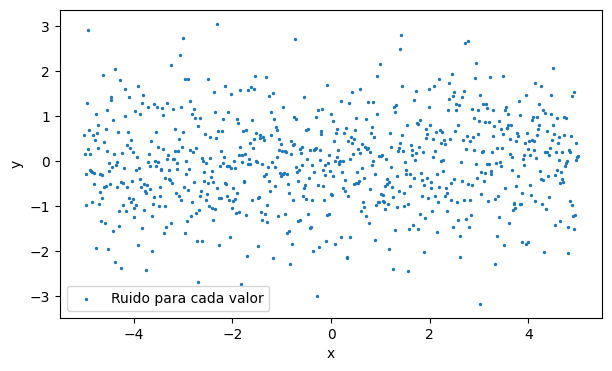

In [31]:
noise = np.random.randn(n)

y = y_flat + noise
noise

plt.figure(figsize=(7,4))
plt.scatter(X,
            noise,
            s = 2,   ## dot size
            label='Ruido para cada valor')

plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

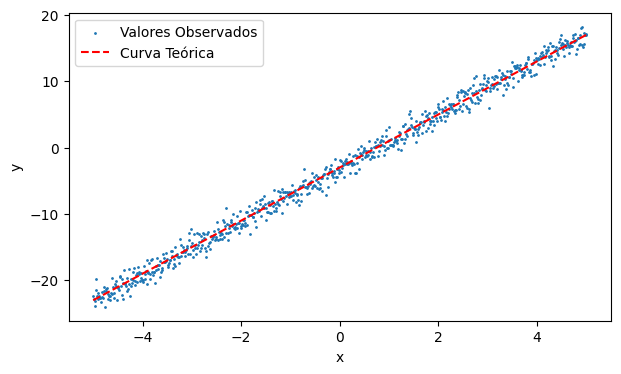

In [32]:
plt.figure(figsize=(7,4))
plt.scatter(X,
            y,
            s = 1,   ## dot size
            label='Valores Observados')
plt.plot(X, y_flat, '--',  label='Curva Teórica', c='r')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

X_reshaped = X.reshape(-1,1)
# The -1 means that the size of that dimension is inferred to make the total number of elements unchanged.
# The 1 in the second dimension means that each element will be in its own inner array (i.e., a column vector).

X_reshaped


array([[-5.        ],
       [-4.98664887],
       [-4.97329773],
       [-4.9599466 ],
       [-4.94659546],
       [-4.93324433],
       [-4.91989319],
       [-4.90654206],
       [-4.89319092],
       [-4.87983979],
       [-4.86648865],
       [-4.85313752],
       [-4.83978638],
       [-4.82643525],
       [-4.81308411],
       [-4.79973298],
       [-4.78638184],
       [-4.77303071],
       [-4.75967957],
       [-4.74632844],
       [-4.7329773 ],
       [-4.71962617],
       [-4.70627503],
       [-4.6929239 ],
       [-4.67957276],
       [-4.66622163],
       [-4.65287049],
       [-4.63951936],
       [-4.62616822],
       [-4.61281709],
       [-4.59946595],
       [-4.58611482],
       [-4.57276368],
       [-4.55941255],
       [-4.54606142],
       [-4.53271028],
       [-4.51935915],
       [-4.50600801],
       [-4.49265688],
       [-4.47930574],
       [-4.46595461],
       [-4.45260347],
       [-4.43925234],
       [-4.4259012 ],
       [-4.41255007],
       [-4

In [45]:
linear_model.fit(X_reshaped, y)

LinearRegression()

In [46]:
print('pendiente sklearn =', linear_model.coef_, ' y su ord. al origen =', linear_model.intercept_)

pendiente sklearn = [4.02130932]  y su ord. al origen = -3.0284982699534715


In [53]:
# Now we are gonna split the data in two separate groups. One to calculate the coefficients and the other to test the result.
# This splitting is crucial in machine learning to evaluate how well a model trained on the training set generalizes to new, unseen data (the test set).
# It helps in assessing the model's performance and detecting overfitting or underfitting.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size = 0.3, random_state = 42)

# 'test_size' is the proportion of the dataset to include in the test split.
# In this case, it's set to 0.3, meaning 30% of the data will be used for testing, and 70% for training.

# 'random_state' When you set a specific value for random_state (for example, random_state=42), you make the random process deterministic.
# This means that every time you run the script or code snippet with the same random_state value, you'll get the same split of the data into training and test sets.


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(525, 1) (525,) (225, 1) (225,)


In [54]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [56]:
coefficients = linear_model.coef_
intercept = linear_model.intercept_

coefficients, intercept

(array([4.03181335]), -3.0523819773609917)

In [ ]:
y_train_predict = linear_model.predict(X_train)
y_test_predict = linear_model.predict(X_test)

# After these predictions are made, you can use them to evaluate the performance of your linear regression model.
# Typically, you would compare these predicted values (y_train_predict and y_test_predict)
# with the actual target values (y_train and y_test) to assess how well your model generalizes to new, unseen data.

In [57]:
linear_model.get_params(deep=True) ## Returns the parameters of the estimator.

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [59]:
linear_model.score(X_reshaped, y, sample_weight=None) # Returns the coefficient of determination R^2 of the prediction.

0.9926520536896748

In [61]:
linear_model.n_features_in_ # Number of features seen during 'fit'

1

In [62]:
linear_model.n_jobs # Number of CPU cores used during the fit process.